In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [21]:
%run ./Combine_csv.ipynb

In [22]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [23]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Combined CSV\ "
suffix_dir = 'combined_education-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [24]:
education = pd.read_csv(today_csv)

In [25]:
education.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Uttarakhand state board class 12 topper travel...,2019-05-31,16:17:00,https://www.hindustantimes.com/education/uttar...
1,Hindiustan Times,Bihar board BSEB 10th compartment result 2019 ...,2019-05-31,17:05:00,https://www.hindustantimes.com/education/bihar...
2,Hindiustan Times,Bihar board 10th compartment result 2019 decla...,2019-05-31,16:23:00,https://www.hindustantimes.com/education/bihar...
3,Hindiustan Times,NEET answer key 2019: Last few hours left to r...,2019-06-01,12:57:00,https://www.hindustantimes.com/education/neet-...
4,Hindiustan Times,RSOS 12th Result: 34.82% students clear Class ...,2019-05-31,16:58:00,https://www.hindustantimes.com/education/rsos-...


In [26]:
education['Newspaper'].value_counts()

Hindiustan Times    53
India Today         49
Time of India       19
Indian Express      16
Name: Newspaper, dtype: int64

In [27]:
education.shape

(137, 5)

In [28]:
#df=education[education['Date']==Today_date]
df=education

Heading = df['Heading']

In [29]:
df.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Uttarakhand state board class 12 topper travel...,2019-05-31,16:17:00,https://www.hindustantimes.com/education/uttar...
1,Hindiustan Times,Bihar board BSEB 10th compartment result 2019 ...,2019-05-31,17:05:00,https://www.hindustantimes.com/education/bihar...
2,Hindiustan Times,Bihar board 10th compartment result 2019 decla...,2019-05-31,16:23:00,https://www.hindustantimes.com/education/bihar...
3,Hindiustan Times,NEET answer key 2019: Last few hours left to r...,2019-06-01,12:57:00,https://www.hindustantimes.com/education/neet-...
4,Hindiustan Times,RSOS 12th Result: 34.82% students clear Class ...,2019-05-31,16:58:00,https://www.hindustantimes.com/education/rsos-...


In [30]:
df['Newspaper'].value_counts()

Hindiustan Times    53
India Today         49
Time of India       19
Indian Express      16
Name: Newspaper, dtype: int64

In [31]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [32]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
stopset = set(stopwords.words('english'))

In [34]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [35]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [37]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [38]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [39]:
 Heading_tokenized[:10]    # 10 out of all

['uttarakhand',
 'state',
 'board',
 'class',
 'topper',
 'travelled',
 '40km',
 'daily',
 'to',
 'reach']

In [40]:
Heading_stemmed[:10]   # 10 out of all

['uttarakhand',
 'state',
 'board',
 'class',
 'topper',
 'travel',
 '40km',
 'daili',
 'to',
 'reach']

In [41]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [42]:
words_frame.head(10)

,words
uttarakhand,uttarakhand
state,state
board,board
class,class
topper,topper
travel,travelled
40km,40km
daili,daily
to,to
reach,reach


TF-IDF

In [43]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [44]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [45]:
print(tfidf_matrix.shape)

(137, 2705)


In [46]:
print(tfidf_matrix[0])

  (0, 2597)	0.13774841098859614
  (0, 2296)	0.16769572385868084
  (0, 376)	0.0932862001383796
  (0, 615)	0.1142616124972421
  (0, 2457)	0.15945512607046652
  (0, 2476)	0.17831970217216075
  (0, 75)	0.17831970217216075
  (0, 779)	0.17831970217216075
  (0, 1925)	0.17831970217216075
  (0, 2183)	0.15945512607046652
  (0, 2608)	0.17831970217216075
  (0, 2297)	0.16769572385868084
  (0, 391)	0.15945512607046652
  (0, 651)	0.17831970217216075
  (0, 2461)	0.17831970217216075
  (0, 2477)	0.17831970217216075
  (0, 76)	0.17831970217216075
  (0, 780)	0.17831970217216075
  (0, 1926)	0.17831970217216075
  (0, 2609)	0.17831970217216075
  (0, 2298)	0.17831970217216075
  (0, 396)	0.17831970217216075
  (0, 652)	0.17831970217216075
  (0, 2462)	0.17831970217216075
  (0, 2478)	0.17831970217216075
  (0, 77)	0.17831970217216075
  (0, 781)	0.17831970217216075
  (0, 2610)	0.17831970217216075
  (0, 2299)	0.17831970217216075
  (0, 397)	0.17831970217216075
  (0, 653)	0.17831970217216075
  (0, 2463)	0.1783197021721

In [47]:
vectorizer.get_feature_names()[:] 

["'s",
 "'s download",
 "'s workplac",
 "'s workplac need",
 "'s workplac need deal",
 '10th',
 '10th 12th',
 '10th 12th result',
 '10th 12th result declar',
 '10th 12th result highlight',
 '10th 12th result pass',
 '10th 12th result uttarakhand',
 '10th compart',
 '10th compart result',
 '10th compart result date',
 '10th compart result declar',
 '10th compart result highlight',
 '10th compartment',
 '10th compartment result',
 '10th compartment result s',
 '10th result',
 '10th result date',
 '10th result date time',
 '10th result tomorrow',
 '10th result tomorrow direct',
 '10th result tomorrow rajresults.nic.in',
 '11th',
 '11th result',
 '11th result today',
 '12th',
 '12th re-evalu',
 '12th re-evalu result',
 '12th re-evalu result befor',
 '12th re-verification/',
 '12th re-verification/ re-evalu',
 '12th re-verification/ re-evalu result',
 '12th result',
 '12th result date',
 '12th result date confirm',
 '12th result declar',
 '12th result declar check',
 '12th result declar mah

In [48]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [49]:
from sklearn.metrics.pairwise import cosine_similarity


In [50]:
dist = cosine_similarity(tfidf_matrix)

In [51]:
dist.shape

(137, 137)

In [52]:
print(dist)

[[1.         0.00889713 0.01219802 ... 0.         0.         0.        ]
 [0.00889713 1.         0.23166656 ... 0.         0.         0.        ]
 [0.01219802 0.23166656 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## K-Means

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [54]:
n_clusters = list (range (15,25))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 15, silhouette score is 0.0540296579730695)
For n = 16, silhouette score is 0.0628555510403497)
For n = 17, silhouette score is 0.06449286271641697)
For n = 18, silhouette score is 0.06635884348344549)
For n = 19, silhouette score is 0.07050589455226872)
For n = 20, silhouette score is 0.0688666791244697)
For n = 21, silhouette score is 0.0804693225405134)
For n = 22, silhouette score is 0.085593439087228)
For n = 23, silhouette score is 0.08731250324924529)
For n = 24, silhouette score is 0.08381129202192888)


In [55]:
n_score

15

In [56]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
clusters = km.labels_.tolist()

In [58]:
df['Cluster'] = clusters

In [59]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [60]:
df['Cluster'].value_counts()

5     24
10    13
4     13
0     12
1     11
14     9
8      9
7      9
2      7
13     6
9      6
3      6
11     5
6      5
12     2
Name: Cluster, dtype: int64

## Plotting the points

In [61]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [62]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14'}


In [63]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#FDF787', 1: '#C9AE8B', 2: '#53FD5E', 3: '#BB9317', 4: '#FAD076', 5: '#38290F', 6: '#5E7B6A', 7: '#A47B15', 8: '#8F5EA4', 9: '#F7931E', 10: '#436ED3', 11: '#C67F41', 12: '#279484', 13: '#7E4567', 14: '#535296'}


In [64]:
type(cluster_colors)

dict

In [65]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,0.011279,0.002008,13,Uttarakhand state board class 12 topper travel...
1,0.011927,0.012826,0,Bihar board BSEB 10th compartment result 2019 ...
2,0.023542,-0.006354,0,Bihar board 10th compartment result 2019 decla...
3,-0.010254,0.002224,2,NEET answer key 2019: Last few hours left to r...
4,-0.002097,0.003366,3,RSOS 12th Result: 34.82% students clear Class ...


In [66]:
groups = df_plot.groupby('label')

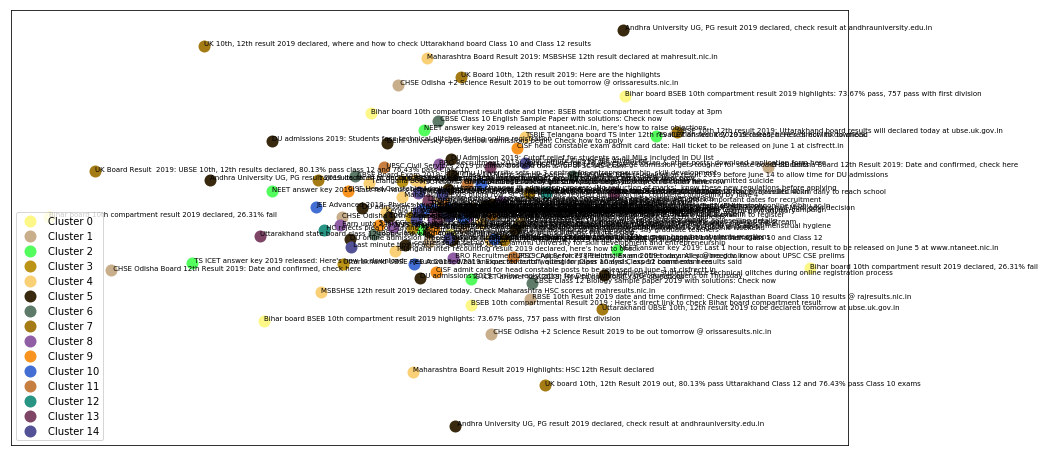

In [67]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [68]:
#centers = np.array(km.cluster_centers_)

In [69]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [70]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [71]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [72]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [73]:
#df.sort_values(by='Cluster')

In [74]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [75]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [76]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [77]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [78]:
#df_less

In [79]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [80]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [81]:
#Result

In [82]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [83]:
#df_more

In [84]:
#Result = Result.append(df_more)

In [85]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [86]:
##Result

In [87]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [88]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [89]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,India Today,10 ways to politely say 'NO',2019-06-02,14:45,https://www.indiatoday.in/education-today/gram...,0
1,India Today,List of 6 manned moon missions: These people ...,2019-06-02,14:45,https://www.indiatoday.in/education-today/gk-c...,0
2,Indian Express,List of top colleges beyond IITs that accept J...,2019-06-02,2:18:16 pm,https://indianexpress.com/article/education/li...,0
3,India Today,This Russia firm is offering women extra pay ...,2019-06-02,14:45,https://www.indiatoday.in/education-today/news...,0
4,India Today,[WATCH] Nipah virus can be transmitted throug...,2019-06-02,14:45,https://www.indiatoday.in/education-today/vide...,0


In [90]:
vectorizer = TfidfVectorizer()

In [91]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [92]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [93]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.1, 0.1, 0.1, 0.1, 0.09, 0.26, 0.23, 0.21, 0.27, 0.12, 0.27, 0.26]


[0.33, 0.23, 0.21, 0.28, 0.12, 0.32, 0.11, 0.32, 0.15, 0.33, 0.14]


[0.53, 0.53, 0.33, 0.32, 0.53, 0.38, 0.48]


[0.19, 0.23, 0.2, 0.2, 0.23, 0.18]


[0.22, 0.19, 0.21, 0.24, 0.12, 0.26, 0.26, 0.11, 0.13, 0.1, 0.13, 0.17, 0.17]


[0.1, 0.09, 0.09, 0.16, 0.08, 0.06, 0.11, 0.12, 0.16, 0.13, 0.05, 0.1, 0.11, 0.17, 0.09, 0.13, 0.09, 0.12, 0.09, 0.1, 0.07, 0.13, 0.16, 0.14]


[0.5, 0.52, 0.26, 0.39, 0.49]


[0.36, 0.32, 0.35, 0.39, 0.26, 0.31, 0.24, 0.41, 0.34]


[0.19, 0.19, 0.24, 0.19, 0.19, 0.18, 0.14, 0.24, 0.16]


[0.35, 0.48, 0.28, 0.46, 0.35, 0.47]


[0.09, 0.11, 0.08, 0.1, 0.11, 0.11, 0.14, 0.09, 0.17, 0.08, 0.14, 0.09, 0.16]


[0.35, 0.42, 0.24, 0.33, 0.35]


[1.0, 1.0]


[0.27, 0.41, 0.41, 0.18, 0.21, 0.2]


[0.22, 0.26, 0.14, 0.22, 0.14, 0.15, 0.22, 0.16, 0.17]




In [94]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [95]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.175833
1     0.230909
2     0.442857
3     0.205000
4     0.177692
5     0.110417
6     0.432000
7     0.331111
8     0.191111
9     0.398333
10    0.113077
11    0.338000
12    1.000000
13    0.280000
14    0.186667
Name: cluster_similarity_value, dtype: float64

In [96]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].std()

Cluster
0     0.079482
1     0.089494
2     0.096560
3     0.020736
4     0.057031
5     0.032501
6     0.108490
7     0.055777
8     0.032575
9     0.082805
10    0.030107
11    0.064576
12    0.000000
13    0.105071
14    0.043875
Name: cluster_similarity_value, dtype: float64

In [97]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,10 ways to politely say 'NO',2019-06-02,14:45,https://www.indiatoday.in/education-today/gram...,0,0.10
1,India Today,List of 6 manned moon missions: These people ...,2019-06-02,14:45,https://www.indiatoday.in/education-today/gk-c...,0,0.10
2,Indian Express,List of top colleges beyond IITs that accept J...,2019-06-02,2:18:16 pm,https://indianexpress.com/article/education/li...,0,0.10
3,India Today,This Russia firm is offering women extra pay ...,2019-06-02,14:45,https://www.indiatoday.in/education-today/news...,0,0.10
4,India Today,[WATCH] Nipah virus can be transmitted throug...,2019-06-02,14:45,https://www.indiatoday.in/education-today/vide...,0,0.09
5,Hindiustan Times,Bihar board BSEB 10th compartment result 2019 ...,2019-05-31,17:05:00,https://www.hindustantimes.com/education/bihar...,0,0.26
6,Hindiustan Times,BSEB 10th compartmental Result 2019 : Here’s d...,2019-05-31,16:22:00,https://www.hindustantimes.com/education/bseb-...,0,0.23
7,Hindiustan Times,Bihar board 10th compartment result date and t...,2019-05-31,16:58:00,https://www.hindustantimes.com/education/bihar...,0,0.21
8,Hindiustan Times,Bihar board 10th compartment result 2019 decla...,2019-05-31,16:23:00,https://www.hindustantimes.com/education/bihar...,0,0.27
9,India Today,5 off-beat career options to break the monoto...,2019-06-02,14:45,https://www.indiatoday.in/education-today/jobs...,0,0.12


In [98]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [99]:
col=df_sorted.columns

In [100]:
temp_more =[]
temp_less  =[]

In [101]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if(cluster_mean<0.50):
            if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
                temp_less.append(cluster.iloc[i])
            else:
                temp_more.append(cluster.iloc[i])
        else:
            if (cluster.iloc[i]['cluster_similarity_value']<0.5):
                temp_less.append(cluster.iloc[i])
            else:
                temp_more.append(cluster.iloc[i])

In [102]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [103]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [104]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,5,Hindiustan Times,Bihar board BSEB 10th compartment result 2019 ...,2019-05-31,17:05:00,https://www.hindustantimes.com/education/bihar...,0,0.26
1,15,Indian Express,CHSE Odisha 12th Science results 2019 to be re...,2019-06-02,1:40:09 pm,https://indianexpress.com/article/education/ch...,1,0.28
2,23,Indian Express,"TS ICET answer key 2019: How to download, rais...",2019-06-01,12:35:20:00,https://indianexpress.com/article/education/ts...,2,0.53
3,34,Hindiustan Times,RSOS 12th Result: 34.82% students clear Class ...,2019-05-31,16:58:00,https://www.hindustantimes.com/education/rsos-...,3,0.23
4,41,Hindiustan Times,Maharashtra Board Result 2019: MSBSHSE 12th re...,2019-05-28,13:07:00,https://www.hindustantimes.com/education/mahar...,4,0.26


In [105]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [106]:
Result = Result.append(df_less_similar)

In [107]:
Result = Result.sort_values(by='Cluster')

In [108]:
Result=Result.reset_index().drop(['index'],axis=1)

In [109]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Hindiustan Times,Bihar board BSEB 10th compartment result 2019 ...,2019-05-31,17:05:00,https://www.hindustantimes.com/education/bihar...,0,0.26
1,Indian Express,List of top colleges beyond IITs that accept J...,2019-06-02,2:18:16 pm,https://indianexpress.com/article/education/li...,0,0.10
2,India Today,This Russia firm is offering women extra pay ...,2019-06-02,14:45,https://www.indiatoday.in/education-today/news...,0,0.10
3,India Today,[WATCH] Nipah virus can be transmitted throug...,2019-06-02,14:45,https://www.indiatoday.in/education-today/vide...,0,0.09
4,India Today,5 off-beat career options to break the monoto...,2019-06-02,14:45,https://www.indiatoday.in/education-today/jobs...,0,0.12
5,India Today,10 ways to politely say 'NO',2019-06-02,14:45,https://www.indiatoday.in/education-today/gram...,0,0.10
6,India Today,List of 6 manned moon missions: These people ...,2019-06-02,14:45,https://www.indiatoday.in/education-today/gk-c...,0,0.10
7,India Today,DRDO is hiring! Apply for 351 technician vaca...,2019-06-02,14:45,https://www.indiatoday.in/education-today/gove...,1,0.12
8,India Today,RBSE 10th Result 2019 date and time confirmed...,2019-06-02,14:45,https://www.indiatoday.in/education-today/news...,1,0.23
9,India Today,CBSE 12th re-verification/ re-evaluation 2019...,2019-06-02,14:45,https://www.indiatoday.in/education-today/news...,1,0.21


In [110]:
outname ='Education-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [111]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [91]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,Earn upto 2 lakh per month by applying for UP...,2019-06-01,22:54,https://timesofindia.indiatimes.com/education-...,0,0.24
1,India Today,[WATCH] Nipah virus can be transmitted throug...,2019-06-01,22:54,https://timesofindia.indiatimes.com/education-...,0,0.17
2,India Today,Why your mental health is an important factor...,2019-06-01,22:54,https://timesofindia.indiatimes.com/education-...,0,0.19
3,Time of India,PCMS doctors up in arms over delayed promotion...,2019-06-01,21:53:00,https://timesofindia.indiatimes.com/home/educa...,0,0.20
4,India Today,10 ways to politely say 'NO',2019-06-01,22:54,https://timesofindia.indiatimes.com/education-...,0,0.17
5,Indian Express,"Andhra University UG, PG result 2019 declared ...",2019-06-01,18:21:28:00,https://indianexpress.com/article/education/an...,1,0.48
6,India Today,"UPCATET result 2019 declared, check result at...",2019-06-01,22:54,https://timesofindia.indiatimes.com/education-...,1,0.67
7,Hindiustan Times,NEET answer key 2019: Last few hours left to r...,2019-06-01,12:57:00,https://www.hindustantimes.com/education/neet-...,2,0.46
8,India Today,NEET answer key 2019: Last 1 hour to raise ob...,2019-06-01,22:54,https://timesofindia.indiatimes.com/education-...,2,0.45
9,Indian Express,"TS ICET answer key 2019: How to download, rais...",2019-06-01,12:35:20:00,https://indianexpress.com/article/education/ts...,2,0.57
